In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tamilnadu-rainfall/ConsolidatedRainfall.json


In [2]:
import json

In [3]:
def json_to_dataframe(file):

    f = open ( file , "r") 
    data = json.loads(f.read())               #loading the json file.
    dept = []                                  
    dist = []                                  #Creating empty lists to store values.
    station = []
    rain = []
    date = []
   
    
    for i in range(len(data)):          
        dep = data[i]['dept']
        dis = data[i]['dist']
        stat = data[i]['station']
        rai = data[i]['value']
        dat = data[i]['date']

        dept.append(dep)
        dist.append(dis)
        station.append(stat)                    # Appending values to lists
        rain.append(rai)
        date.append(dat)

    print('Done')      # for indication perpose.
    new_dataframe = pd.DataFrame(columns=['district','station','rainfall','date']) # Creating empty DataFrame.
    #new_df.department = dept
    new_dataframe.district = dist           #intializing list values to the DataFrame.
    new_dataframe.station = station
    new_dataframe.rainfall = rain
    new_dataframe.date = date
    
    print('Done')      # for indication perpose.
    final_dataframe = new_dataframe.drop_duplicates(keep='first')  # Dropping duplicate rows from the create Dataframe.
    return final_dataframe

In [4]:
rainfall_data = json_to_dataframe('/kaggle/input/tamilnadu-rainfall/ConsolidatedRainfall.json')
rainfall_data

Done
Done


,district,station,rainfall,date
0,The Nilgiris,Devala,5.0,1990-02-13
1,Coimbatore,"Taluk Office, Pollachi",8.0,1990-10-17
2,Coimbatore,"Taluk Office, Pollachi",34.0,1990-10-18
3,Mayiladuthurai,Anaikaranchatram (Kollidam),13.0,1990-10-18
4,Mayiladuthurai,Sirkali,12.4,1990-10-18
...,...,...,...,...
650612,Coimbatore,Airport Peelamedu,0.4,2023-12-25
650613,Theni,Thekkadi,0.4,2023-12-25
650614,Nagapattinam,Nagapattinam,0.4,2023-12-25
650615,Chennai,Zone 14 U41 Perungudi,0.2,2023-12-25


In [5]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638987 entries, 0 to 650616
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   district  638987 non-null  object 
 1   station   638987 non-null  object 
 2   rainfall  638987 non-null  float64
 3   date      638987 non-null  object 
dtypes: float64(1), object(3)
memory usage: 24.4+ MB


            rainfall
count  638987.000000
mean       17.230399
std        23.680493
min         0.010000
25%         3.600000
50%         9.000000
75%        21.800000
max       950.000000
district    0
station     0
rainfall    0
date        0
dtype: int64


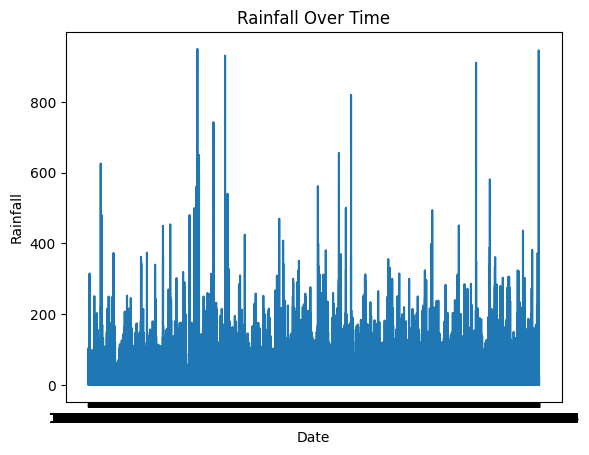

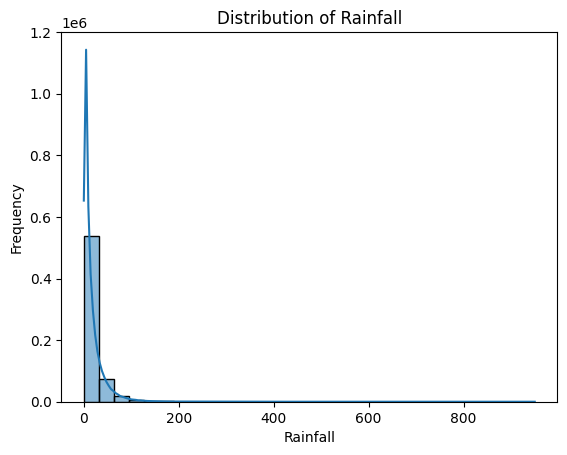

In [6]:
# Descriptive statistics
print(rainfall_data.describe())

# Check for missing values
print(rainfall_data.isnull().sum())

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot
plt.plot(rainfall_data['date'], rainfall_data['rainfall'])
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall Over Time')
plt.show()

# Histogram
sns.histplot(rainfall_data['rainfall'], bins=30, kde=True)
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Distribution of Rainfall')
plt.show()

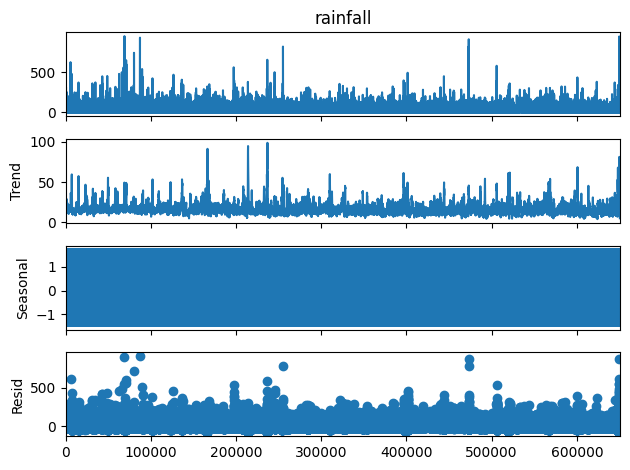

In [7]:
# Convert timestamp to datetime
rainfall_data['date'] = pd.to_datetime(rainfall_data['date'])

# Extract temporal features
rainfall_data['Year'] = rainfall_data['date'].dt.year
rainfall_data['Month'] = rainfall_data['date'].dt.month
rainfall_data['Season'] = rainfall_data['date'].dt.quarter  # Assuming you consider quarters as seasons

# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(rainfall_data['rainfall'], model='additive', period=365)
result.plot()
plt.show()

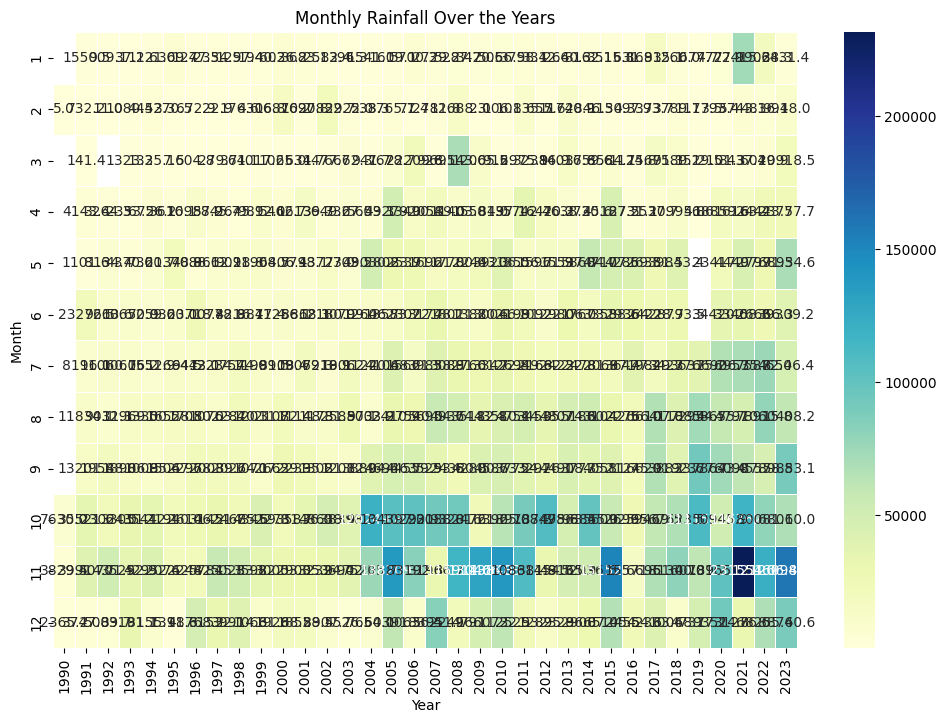

In [8]:
pivot_table = pd.pivot_table(rainfall_data, values='rainfall', index=rainfall_data['date'].dt.month, columns=rainfall_data['date'].dt.year, aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Monthly Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()